In [71]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [73]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist        # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩용
from tensorflow.keras.models import Sequential, load_model  # 모델생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt               # 학습과정 loss, accuracy 보기
np.random.seed(4)

In [3]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print(data[0].shape)
print(data[0, 0])
print(data[0, 1:].reshape(28, 28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [5]:
# 비추
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [6]:
for row in data[0,1:].reshape(28,-1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

5.0

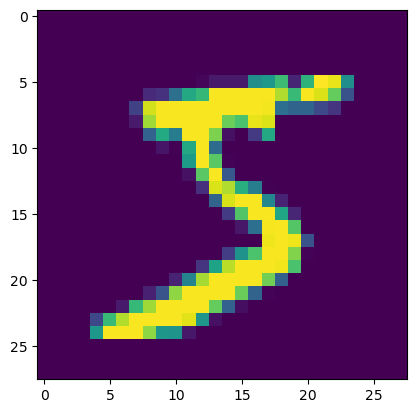

In [7]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

# 1. 데이터 생성 & 전처리

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
for row in X_train[1]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

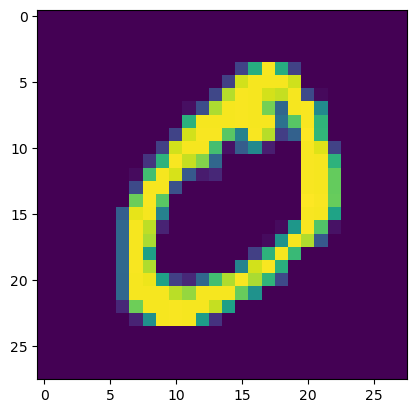

In [10]:
plt.plot(figsize=(2,2))
plt.imshow(X_train[1])
plt.show()

In [11]:
Y_train[1]

0

In [12]:
# 훈련섹(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
# 검증셋을(만개) 하기위해 X_train, Y_train 을 다시 재정의
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [13]:
# 훈련시(학습시 사용), 검증셋(fit에서 사용), 시험셋(평가시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [14]:
# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나누기)
# 두 번 실행 X
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [15]:
# 훈련셋(5만)과 검증셋(1만) -> 700개, 300개만 random으로 choice
# random.choice([1, 2, 3])  # list에서 한 개를 choice
train_idxs = np.random.choice(50000, 700)  # 0부터 500미만의 무작위 수 3개
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

8


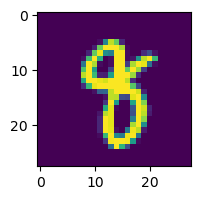

In [16]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0].reshape(-1, 28))
print(Y_train[0])
plt.show()

In [17]:
# 종속변수 전처리 : 원핫인코딩(to_categorical(넘파이배열을 반환), pd.get_dummies(데이터프레임을 반환))
print('원핫인코딩 전 shape : ', Y_train.shape, Y_val.shape, Y_test.shape)
# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)
print('원핫인코딩 후 shape : ', Y_train.shape, Y_val.shape, Y_test.shape)

원핫인코딩 전 shape :  (700,) (300,) (10000,)
원핫인코딩 후 shape :  (700, 10) (300, 10) (10000, 10)


In [18]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


# 2. 모델 구성하기

In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,
               activation='relu'))
model.add(Dense(units=10,
               activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 모델 학습과정 설정

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습

In [21]:
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 42ms/step - loss: 2.2973 - accuracy: 0.1229 - val_loss: 2.2771 - val_accuracy: 0.1067
Epoch 2/1200
7/7 [==============================] - 0s 9ms/step - loss: 2.2630 - accuracy: 0.1186 - val_loss: 2.2402 - val_accuracy: 0.1133
Epoch 3/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2223 - accuracy: 0.1229 - val_loss: 2.2025 - val_accuracy: 0.1100
Epoch 4/1200
7/7 [==============================] - 0s 6ms/step - loss: 2.1822 - accuracy: 0.1143 - val_loss: 2.1678 - val_accuracy: 0.1133
Epoch 5/1200
7/7 [==============================] - 0s 6ms/step - loss: 2.1465 - accuracy: 0.1143 - val_loss: 2.1378 - val_accuracy: 0.1133
Epoch 6/1200
7/7 [==============================] - 0s 6ms/step - loss: 2.1144 - accuracy: 0.1229 - val_loss: 2.1115 - val_accuracy: 0.1200
Epoch 7/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.0879 - accuracy: 0.1300 - val_loss: 2.0888 - val_accuracy: 0.1333
Epoch 8/1200
7/7 [=

7/7 [==============================] - 0s 6ms/step - loss: 1.3139 - accuracy: 0.5486 - val_loss: 1.5539 - val_accuracy: 0.4300
Epoch 118/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.3107 - accuracy: 0.5543 - val_loss: 1.5529 - val_accuracy: 0.4300
Epoch 119/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.3075 - accuracy: 0.5586 - val_loss: 1.5499 - val_accuracy: 0.4300
Epoch 120/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.3043 - accuracy: 0.5471 - val_loss: 1.5511 - val_accuracy: 0.4333
Epoch 121/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.3011 - accuracy: 0.5600 - val_loss: 1.5465 - val_accuracy: 0.4467
Epoch 122/1200
7/7 [==============================] - 0s 9ms/step - loss: 1.2983 - accuracy: 0.5543 - val_loss: 1.5463 - val_accuracy: 0.4333
Epoch 123/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.2948 - accuracy: 0.5586 - val_loss: 1.5446 - val_accuracy: 0.4433
Epoch 124/1200
7/7 [=

Epoch 175/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1574 - accuracy: 0.6100 - val_loss: 1.5175 - val_accuracy: 0.4800
Epoch 176/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1551 - accuracy: 0.6186 - val_loss: 1.5185 - val_accuracy: 0.4800
Epoch 177/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1532 - accuracy: 0.6171 - val_loss: 1.5178 - val_accuracy: 0.4800
Epoch 178/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1512 - accuracy: 0.6200 - val_loss: 1.5196 - val_accuracy: 0.4800
Epoch 179/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1494 - accuracy: 0.6143 - val_loss: 1.5221 - val_accuracy: 0.4833
Epoch 180/1200
7/7 [==============================] - 0s 5ms/step - loss: 1.1474 - accuracy: 0.6214 - val_loss: 1.5195 - val_accuracy: 0.4800
Epoch 181/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1442 - accuracy: 0.6186 - val_loss: 1.5177 - val_accuracy: 0.4800
Epoch 

Epoch 233/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0477 - accuracy: 0.6557 - val_loss: 1.5400 - val_accuracy: 0.5000
Epoch 234/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0479 - accuracy: 0.6514 - val_loss: 1.5391 - val_accuracy: 0.5033
Epoch 235/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0445 - accuracy: 0.6514 - val_loss: 1.5421 - val_accuracy: 0.5033
Epoch 236/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0432 - accuracy: 0.6514 - val_loss: 1.5400 - val_accuracy: 0.4933
Epoch 237/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0414 - accuracy: 0.6571 - val_loss: 1.5407 - val_accuracy: 0.5000
Epoch 238/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0397 - accuracy: 0.6614 - val_loss: 1.5420 - val_accuracy: 0.5033
Epoch 239/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.0379 - accuracy: 0.6600 - val_loss: 1.5425 - val_accuracy: 0.5000
Epoch 

Epoch 291/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9657 - accuracy: 0.6800 - val_loss: 1.5860 - val_accuracy: 0.5067
Epoch 292/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9634 - accuracy: 0.6814 - val_loss: 1.5866 - val_accuracy: 0.5033
Epoch 293/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.9620 - accuracy: 0.6814 - val_loss: 1.5866 - val_accuracy: 0.5067
Epoch 294/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9609 - accuracy: 0.6857 - val_loss: 1.5890 - val_accuracy: 0.5033
Epoch 295/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.9597 - accuracy: 0.6786 - val_loss: 1.5905 - val_accuracy: 0.5067
Epoch 296/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9584 - accuracy: 0.6843 - val_loss: 1.5907 - val_accuracy: 0.5067
Epoch 297/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.9569 - accuracy: 0.6800 - val_loss: 1.5922 - val_accuracy: 0.5033
Epoch 

Epoch 349/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8971 - accuracy: 0.7086 - val_loss: 1.6468 - val_accuracy: 0.4900
Epoch 350/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8950 - accuracy: 0.7043 - val_loss: 1.6467 - val_accuracy: 0.4867
Epoch 351/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8948 - accuracy: 0.7029 - val_loss: 1.6470 - val_accuracy: 0.4933
Epoch 352/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8940 - accuracy: 0.7086 - val_loss: 1.6517 - val_accuracy: 0.4967
Epoch 353/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8926 - accuracy: 0.7057 - val_loss: 1.6506 - val_accuracy: 0.4900
Epoch 354/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8913 - accuracy: 0.7029 - val_loss: 1.6548 - val_accuracy: 0.4900
Epoch 355/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.8907 - accuracy: 0.7057 - val_loss: 1.6557 - val_accuracy: 0.4900
Epoch 

Epoch 407/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8386 - accuracy: 0.7243 - val_loss: 1.7169 - val_accuracy: 0.4667
Epoch 408/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8371 - accuracy: 0.7257 - val_loss: 1.7179 - val_accuracy: 0.4667
Epoch 409/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8362 - accuracy: 0.7243 - val_loss: 1.7193 - val_accuracy: 0.4700
Epoch 410/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8356 - accuracy: 0.7257 - val_loss: 1.7194 - val_accuracy: 0.4667
Epoch 411/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.8348 - accuracy: 0.7257 - val_loss: 1.7210 - val_accuracy: 0.4667
Epoch 412/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8343 - accuracy: 0.7257 - val_loss: 1.7209 - val_accuracy: 0.4667
Epoch 413/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.8327 - accuracy: 0.7243 - val_loss: 1.7225 - val_accuracy: 0.4667
Epoch 

Epoch 465/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7881 - accuracy: 0.7429 - val_loss: 1.8031 - val_accuracy: 0.4633
Epoch 466/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7874 - accuracy: 0.7486 - val_loss: 1.8047 - val_accuracy: 0.4567
Epoch 467/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7860 - accuracy: 0.7429 - val_loss: 1.8056 - val_accuracy: 0.4600
Epoch 468/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7861 - accuracy: 0.7443 - val_loss: 1.8046 - val_accuracy: 0.4667
Epoch 469/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7849 - accuracy: 0.7457 - val_loss: 1.8043 - val_accuracy: 0.4633
Epoch 470/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7844 - accuracy: 0.7443 - val_loss: 1.8064 - val_accuracy: 0.4567
Epoch 471/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7831 - accuracy: 0.7429 - val_loss: 1.8085 - val_accuracy: 0.4667
Epoch 

Epoch 523/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7429 - accuracy: 0.7643 - val_loss: 1.8949 - val_accuracy: 0.4767
Epoch 524/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7427 - accuracy: 0.7629 - val_loss: 1.8985 - val_accuracy: 0.4767
Epoch 525/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7413 - accuracy: 0.7657 - val_loss: 1.9026 - val_accuracy: 0.4733
Epoch 526/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7411 - accuracy: 0.7657 - val_loss: 1.9033 - val_accuracy: 0.4767
Epoch 527/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7410 - accuracy: 0.7671 - val_loss: 1.9057 - val_accuracy: 0.4733
Epoch 528/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7393 - accuracy: 0.7643 - val_loss: 1.9029 - val_accuracy: 0.4733
Epoch 529/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.7384 - accuracy: 0.7671 - val_loss: 1.9055 - val_accuracy: 0.4767
Epoch 

Epoch 581/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7029 - accuracy: 0.7757 - val_loss: 2.0006 - val_accuracy: 0.4600
Epoch 582/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.7023 - accuracy: 0.7800 - val_loss: 2.0062 - val_accuracy: 0.4667
Epoch 583/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.7015 - accuracy: 0.7786 - val_loss: 2.0100 - val_accuracy: 0.4633
Epoch 584/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.7786 - val_loss: 2.0122 - val_accuracy: 0.4667
Epoch 585/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.7000 - accuracy: 0.7786 - val_loss: 2.0162 - val_accuracy: 0.4633
Epoch 586/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6997 - accuracy: 0.7771 - val_loss: 2.0130 - val_accuracy: 0.4633
Epoch 587/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.7786 - val_loss: 2.0170 - val_accuracy: 0.4667
Epoch 

Epoch 639/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6646 - accuracy: 0.7929 - val_loss: 2.1185 - val_accuracy: 0.4667
Epoch 640/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6638 - accuracy: 0.7900 - val_loss: 2.1260 - val_accuracy: 0.4700
Epoch 641/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.6643 - accuracy: 0.7957 - val_loss: 2.1244 - val_accuracy: 0.4700
Epoch 642/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6629 - accuracy: 0.7900 - val_loss: 2.1298 - val_accuracy: 0.4700
Epoch 643/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6617 - accuracy: 0.7943 - val_loss: 2.1312 - val_accuracy: 0.4700
Epoch 644/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6616 - accuracy: 0.7943 - val_loss: 2.1281 - val_accuracy: 0.4700
Epoch 645/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.7914 - val_loss: 2.1302 - val_accuracy: 0.4700
Epoch 

Epoch 697/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6303 - accuracy: 0.8157 - val_loss: 2.2605 - val_accuracy: 0.4700
Epoch 698/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6298 - accuracy: 0.8157 - val_loss: 2.2613 - val_accuracy: 0.4700
Epoch 699/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.8129 - val_loss: 2.2622 - val_accuracy: 0.4733
Epoch 700/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6288 - accuracy: 0.8114 - val_loss: 2.2726 - val_accuracy: 0.4767
Epoch 701/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.6281 - accuracy: 0.8157 - val_loss: 2.2642 - val_accuracy: 0.4733
Epoch 702/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6272 - accuracy: 0.8114 - val_loss: 2.2753 - val_accuracy: 0.4733
Epoch 703/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.6262 - accuracy: 0.8171 - val_loss: 2.2668 - val_accuracy: 0.4700
Epoch 

Epoch 755/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5987 - accuracy: 0.8229 - val_loss: 2.4102 - val_accuracy: 0.4700
Epoch 756/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5982 - accuracy: 0.8243 - val_loss: 2.4127 - val_accuracy: 0.4700
Epoch 757/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5980 - accuracy: 0.8229 - val_loss: 2.4148 - val_accuracy: 0.4700
Epoch 758/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5970 - accuracy: 0.8271 - val_loss: 2.4168 - val_accuracy: 0.4700
Epoch 759/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5966 - accuracy: 0.8257 - val_loss: 2.4245 - val_accuracy: 0.4700
Epoch 760/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5961 - accuracy: 0.8271 - val_loss: 2.4263 - val_accuracy: 0.4700
Epoch 761/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5961 - accuracy: 0.8243 - val_loss: 2.4316 - val_accuracy: 0.4700
Epoch 

Epoch 813/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5714 - accuracy: 0.8400 - val_loss: 2.5655 - val_accuracy: 0.4633
Epoch 814/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5705 - accuracy: 0.8414 - val_loss: 2.5663 - val_accuracy: 0.4600
Epoch 815/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.5700 - accuracy: 0.8386 - val_loss: 2.5714 - val_accuracy: 0.4667
Epoch 816/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.8329 - val_loss: 2.5794 - val_accuracy: 0.4633
Epoch 817/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5692 - accuracy: 0.8343 - val_loss: 2.5690 - val_accuracy: 0.4600
Epoch 818/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5688 - accuracy: 0.8386 - val_loss: 2.5749 - val_accuracy: 0.4633
Epoch 819/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5681 - accuracy: 0.8429 - val_loss: 2.5769 - val_accuracy: 0.4633
Epoch 

Epoch 871/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5432 - accuracy: 0.8500 - val_loss: 2.7301 - val_accuracy: 0.4567
Epoch 872/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.8457 - val_loss: 2.7285 - val_accuracy: 0.4533
Epoch 873/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5425 - accuracy: 0.8457 - val_loss: 2.7324 - val_accuracy: 0.4533
Epoch 874/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5423 - accuracy: 0.8500 - val_loss: 2.7453 - val_accuracy: 0.4567
Epoch 875/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5425 - accuracy: 0.8471 - val_loss: 2.7428 - val_accuracy: 0.4533
Epoch 876/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5415 - accuracy: 0.8486 - val_loss: 2.7428 - val_accuracy: 0.4567
Epoch 877/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5410 - accuracy: 0.8471 - val_loss: 2.7573 - val_accuracy: 0.4533
Epoch 

Epoch 929/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5198 - accuracy: 0.8529 - val_loss: 2.8963 - val_accuracy: 0.4500
Epoch 930/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5202 - accuracy: 0.8514 - val_loss: 2.8984 - val_accuracy: 0.4533
Epoch 931/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.5188 - accuracy: 0.8543 - val_loss: 2.9035 - val_accuracy: 0.4500
Epoch 932/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5189 - accuracy: 0.8529 - val_loss: 2.8968 - val_accuracy: 0.4467
Epoch 933/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5180 - accuracy: 0.8529 - val_loss: 2.9079 - val_accuracy: 0.4500
Epoch 934/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.5174 - accuracy: 0.8557 - val_loss: 2.9068 - val_accuracy: 0.4567
Epoch 935/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.5174 - accuracy: 0.8543 - val_loss: 2.9156 - val_accuracy: 0.4533
Epoch 

Epoch 987/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4974 - accuracy: 0.8643 - val_loss: 3.0675 - val_accuracy: 0.4433
Epoch 988/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.4972 - accuracy: 0.8643 - val_loss: 3.0535 - val_accuracy: 0.4467
Epoch 989/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4970 - accuracy: 0.8643 - val_loss: 3.0726 - val_accuracy: 0.4467
Epoch 990/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4964 - accuracy: 0.8629 - val_loss: 3.0740 - val_accuracy: 0.4500
Epoch 991/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.8643 - val_loss: 3.0709 - val_accuracy: 0.4467
Epoch 992/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4957 - accuracy: 0.8643 - val_loss: 3.0813 - val_accuracy: 0.4467
Epoch 993/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.8643 - val_loss: 3.0824 - val_accuracy: 0.4433
Epoch 

7/7 [==============================] - 0s 6ms/step - loss: 0.4578 - accuracy: 0.8686 - val_loss: 3.4052 - val_accuracy: 0.4367
Epoch 1102/1200
7/7 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.8729 - val_loss: 3.4069 - val_accuracy: 0.4400
Epoch 1103/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4569 - accuracy: 0.8729 - val_loss: 3.3922 - val_accuracy: 0.4400
Epoch 1104/1200
7/7 [==============================] - 0s 8ms/step - loss: 0.4569 - accuracy: 0.8729 - val_loss: 3.4120 - val_accuracy: 0.4433
Epoch 1105/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4563 - accuracy: 0.8729 - val_loss: 3.4038 - val_accuracy: 0.4467
Epoch 1106/1200
7/7 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.8729 - val_loss: 3.4053 - val_accuracy: 0.4400
Epoch 1107/1200
7/7 [==============================] - 0s 7ms/step - loss: 0.4560 - accuracy: 0.8729 - val_loss: 3.4249 - val_accuracy: 0.4433
Epoch 1108/1200

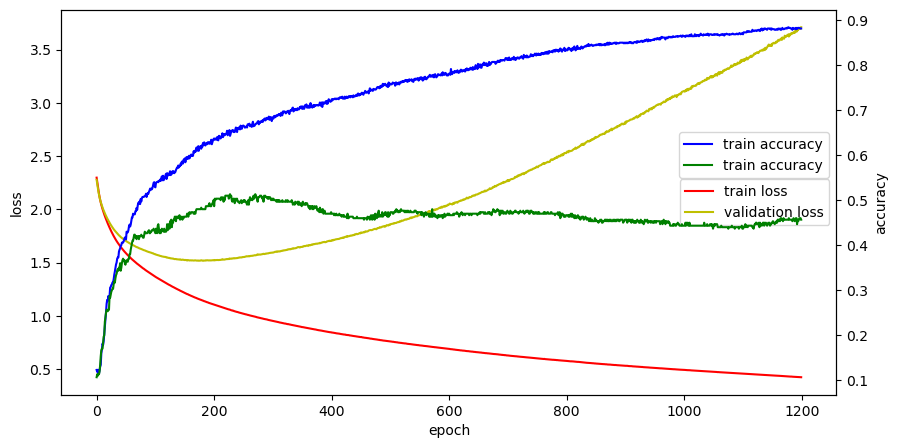

In [22]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수1

In [23]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%50 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # mnist 데이터를 가져옴 (이미지)

# 훈련셋(6만개) = 5만개 + 1만개(val)
X_val = X_train[50000: ] # 독립변수
Y_val = Y_train[50000: ] # 종속변수
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나누기)
# 두 번 실행 X
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

# 훈련셋(5만)과 검증셋(1만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)  # 0부터 500미만의 무작위 수 3개
val_idxs   = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,  activation='relu'))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 verbose=0,
                 callbacks=[customHistory])

epoch : 50, loss : 1.6659458875656128, accuracy : 0.3700000047683716, val_loss : 1.748632550239563, val_accuracy : 0.3333333432674408
epoch : 100, loss : 1.4369443655014038, accuracy : 0.49000000953674316, val_loss : 1.6088898181915283, val_accuracy : 0.4300000071525574
epoch : 150, loss : 1.2589285373687744, accuracy : 0.572857141494751, val_loss : 1.5429389476776123, val_accuracy : 0.5066666603088379
epoch : 200, loss : 1.097330093383789, accuracy : 0.6371428370475769, val_loss : 1.526609182357788, val_accuracy : 0.5233333110809326
epoch : 250, loss : 1.0076714754104614, accuracy : 0.6485714316368103, val_loss : 1.5668668746948242, val_accuracy : 0.4866666793823242
epoch : 300, loss : 0.9427322745323181, accuracy : 0.6585714221000671, val_loss : 1.6238211393356323, val_accuracy : 0.4866666793823242
epoch : 350, loss : 0.8890402913093567, accuracy : 0.6957142949104309, val_loss : 1.6979225873947144, val_accuracy : 0.5
epoch : 400, loss : 0.8427508473396301, accuracy : 0.71571427583694

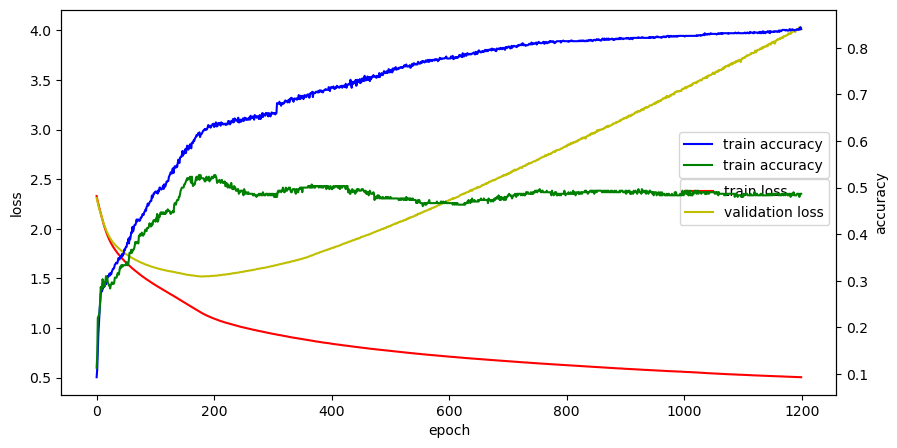

In [24]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## ※ 콜백함수2 - Early Stopping(조기 종료)
 - val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [28]:
#1 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
train_idxs = np.random.choice(50000, 700)
val_idxs = np.random.choice(10000, 300)

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val = X_val[val_idxs]
Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu')) # https://keras.io/api/layers/activations/
model.add(Dense(units=10, activation='softmax'))
print(model.summary())

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=2)  # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop (monitor='val_loss' 기본값)
# earlyStopping = EarlyStopping(patience=2, 
#                               monitor='val_accuracy',  # val_accuracy 가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                               # 성급한 조기종료          # loss, accuracy, val_loss(기본값), val_accuracy
#                              )
earlyStopping = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train, 
                 epochs=1200, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 # verbose=0,
                 callbacks=[earlyStopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 1570      
                                                                 
 dense_11 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1200
7/7 [==============================] - 1s 33ms/step - loss: 2.3005 - accuracy: 0.0886 - val_loss: 2.2951 - val_accuracy: 0.1600
Epoch 2/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2870 - accuracy: 0.1500 - val_loss: 2.2745 - val_accuracy: 0.1767
Epoch 3/1200
7/7 [==============================] - 0s 7ms/step - loss: 2.2708 - accuracy: 0.1514 - val_loss: 2.2567 - val_accuracy: 0.1733
Epoch 4/1200
7/7 [====

7/7 [==============================] - 0s 7ms/step - loss: 1.4367 - accuracy: 0.4614 - val_loss: 1.5536 - val_accuracy: 0.4400
Epoch 113/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4329 - accuracy: 0.4614 - val_loss: 1.5502 - val_accuracy: 0.4400
Epoch 114/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.4295 - accuracy: 0.4643 - val_loss: 1.5488 - val_accuracy: 0.4400
Epoch 115/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.4263 - accuracy: 0.4600 - val_loss: 1.5473 - val_accuracy: 0.4400
Epoch 116/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.4232 - accuracy: 0.4643 - val_loss: 1.5470 - val_accuracy: 0.4367
Epoch 117/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.4198 - accuracy: 0.4614 - val_loss: 1.5432 - val_accuracy: 0.4400
Epoch 118/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.4161 - accuracy: 0.4600 - val_loss: 1.5432 - val_accuracy: 0.4400
Epoch 119/1200
7/7 [=

Epoch 170/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2858 - accuracy: 0.5000 - val_loss: 1.4920 - val_accuracy: 0.4400
Epoch 171/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.2836 - accuracy: 0.4986 - val_loss: 1.4908 - val_accuracy: 0.4367
Epoch 172/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2818 - accuracy: 0.5000 - val_loss: 1.4899 - val_accuracy: 0.4367
Epoch 173/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2795 - accuracy: 0.5014 - val_loss: 1.4878 - val_accuracy: 0.4333
Epoch 174/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2779 - accuracy: 0.5029 - val_loss: 1.4878 - val_accuracy: 0.4333
Epoch 175/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.2750 - accuracy: 0.5071 - val_loss: 1.4877 - val_accuracy: 0.4333
Epoch 176/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.2742 - accuracy: 0.5071 - val_loss: 1.4876 - val_accuracy: 0.4333
Epoch 

Epoch 228/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1878 - accuracy: 0.5286 - val_loss: 1.4806 - val_accuracy: 0.4233
Epoch 229/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1861 - accuracy: 0.5214 - val_loss: 1.4798 - val_accuracy: 0.4267
Epoch 230/1200
7/7 [==============================] - 0s 7ms/step - loss: 1.1852 - accuracy: 0.5343 - val_loss: 1.4801 - val_accuracy: 0.4233
Epoch 231/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.1838 - accuracy: 0.5286 - val_loss: 1.4792 - val_accuracy: 0.4267
Epoch 232/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1828 - accuracy: 0.5300 - val_loss: 1.4786 - val_accuracy: 0.4267
Epoch 233/1200
7/7 [==============================] - 0s 8ms/step - loss: 1.1830 - accuracy: 0.5343 - val_loss: 1.4788 - val_accuracy: 0.4267
Epoch 234/1200
7/7 [==============================] - 0s 6ms/step - loss: 1.1809 - accuracy: 0.5329 - val_loss: 1.4789 - val_accuracy: 0.4267
Epoch

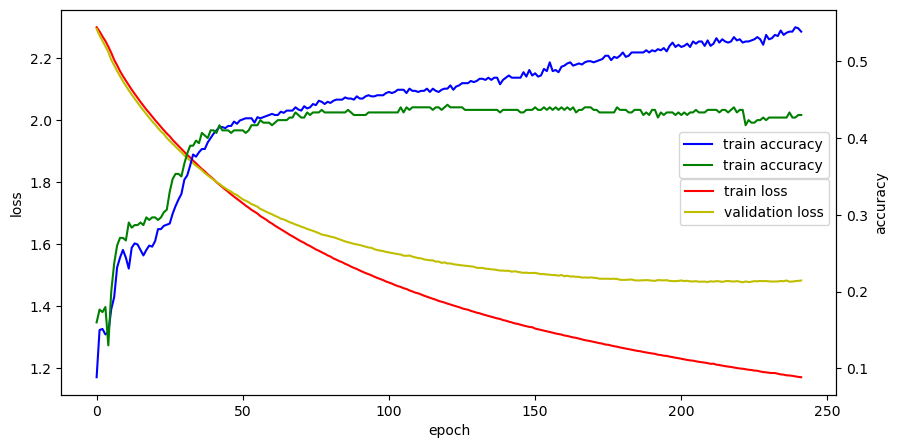

In [29]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

## 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보 (추가)
- 레이어 층 늘리기
- 활성화 함수 : 은닉층에 주로 relu계열 (elu ... )
- optimizer, epoch 등을 조정

In [41]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback):  # on_epoch_end() : 각 epoch 종료 시 자동 호출됨
    def __init__(self):  # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%2 == 0:
            print('epoch : {}, loss : {}, accuracy : {}, val_loss : {}, val_accuracy : {}'
                  .format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))

# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 훈련셋(5만)과 검증셋(만) -> 700개, 300개만 random으로 choice
# 데이터량을 줄인 것으로 아래를 주석처리하면 데이터 확보 가능
# train_idxs = np.random.choice(50000, 700)
# val_idxs = np.random.choice(10000, 300)

# X_train = X_train[train_idxs]
# Y_train = Y_train[train_idxs]
# X_val = X_val[val_idxs]
# Y_val = Y_val[val_idxs]

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=64, activation='relu'))  # https://keras.io/api/layers/activations/
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
print(model.summary())

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# 4. 모델 학습 (콜백 적용)
from tensorflow.keras.callbacks import EarlyStopping
# earlyStopping = EarlyStopping(patience=2)  # val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop (monitor='val_loss' 기본값)
# earlyStopping = EarlyStopping(patience=2, 
#                               monitor='val_accuracy',  # val_accuracy 가 연달아 2번 이상 성능이 좋아지지 않으면 stop
#                               # 성급한 조기종료          # loss, accuracy, val_loss(기본값), val_accuracy
#                              )
earlyStopping = EarlyStopping(patience=20)
customHistory = CustomHistory()
hist = model.fit(X_train, Y_train, 
                 epochs=1000, 
                 batch_size=100,
                 validation_data=(X_val, Y_val),
                 verbose=0,
                 callbacks=[earlyStopping, customHistory])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                50240     
                                                                 
 dense_55 (Dense)            (None, 16)                1040      
                                                                 
 dense_56 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________
None
epoch : 2, loss : 0.21160893142223358, accuracy : 0.939079999923706, val_loss : 0.16863293945789337, val_accuracy : 0.9542999863624573
epoch : 4, loss : 0.1310432106256485, accuracy : 0.9621999859809875, val_loss : 0.1294836550951004, val_accuracy : 0.964900016784668
epoch : 6, loss : 0.09550003707408905, a

# 5. 모델 평가하기(그래프, 평가함수(evaluate)) 

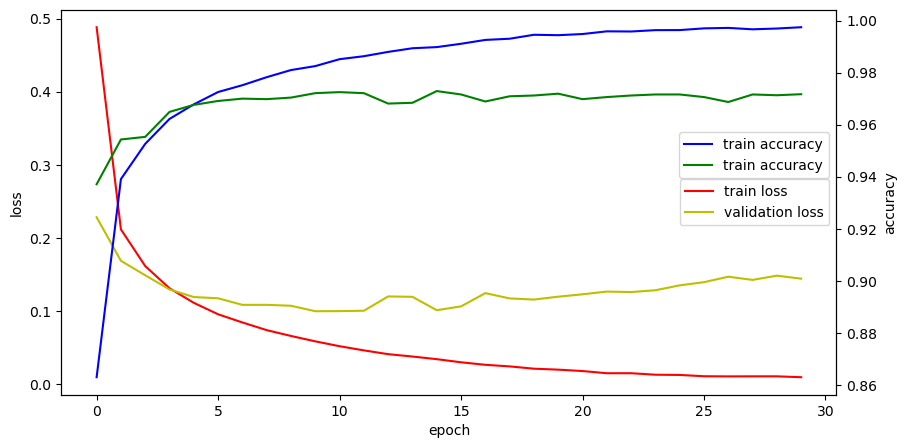

In [42]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [43]:
# 모델 평가
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss : ', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

100/100 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9723
loss :  0.13245490193367004
accuracy :  0.9722999930381775


# 6. 모델 저장
 - 1. 학습된 모델 저장 : h5파일 (모델 로드 시 추가 학습 필요X)
 - 2. 모델 구성만 저장 : json파일 (모델 로드 시 추가 학습 필요)

In [44]:
# 1. 학습된 모델 저장
model.save('model/mnist.h5')

In [45]:
# 학습된 모델 로드하기
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                50240     
                                                                 
 dense_55 (Dense)            (None, 16)                1040      
                                                                 
 dense_56 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [46]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1325 - accuracy: 0.9723


[0.13245488703250885, 0.9722999930381775]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


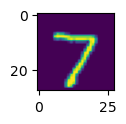

In [49]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0].reshape(28, 28))
print(Y_test[0])  # 1차원
print(Y_test[0].argmax())
plt.show()

In [50]:
# 모델 사용하기
X_test[0].shape  # 1차원

(784,)

In [63]:
result = model2.predict(X_test[0].reshape(1, 784))
print('실제값(원핫인코딩) : ', Y_test[0])
print('실제값 : ', Y_test[0].argmax())
print('예측값(원핫인코딩) : ', [round(r, 5) for r in result[0]])
print('예측값 : ', result[0].argmax())

1/1 [==============================] - 0s 18ms/step
실제값(원핫인코딩) :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
실제값 :  7
예측값(원핫인코딩) :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
예측값 :  7


In [64]:
# 2. 모델 구성만 저장
model_json = model.to_json()
with open('model/mnist.json', 'w') as f:
    f.write(model_json)

In [65]:
# 저장된 모델 구성 가져오기
with open('model/mnist.json', 'r') as f:
    model_json2 = f.read()

In [66]:
model_json2

'{"class_name": "Sequential", "config": {"name": "sequential_18", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_19"}}, {"class_name": "Dense", "config": {"name": "dense_54", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_55", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activi

In [67]:
# model_json2 => 모델 구조 가져오기
from tensorflow.keras.models import model_from_json
model3 = model_from_json(model_json2)
model3.summary()  # 학습 전 모델

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                50240     
                                                                 
 dense_55 (Dense)            (None, 16)                1040      
                                                                 
 dense_56 (Dense)            (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [68]:
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.3387 - accuracy: 0.1018


[2.338684558868408, 0.10180000215768814]

In [69]:
model3.fit(X_train, Y_train, epochs=100, batch_size=500, validation_data=[X_val, Y_val], callbacks=[earlyStopping])

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.9076 - accuracy: 0.7558 - val_loss: 0.3473 - val_accuracy: 0.9091
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.3155 - accuracy: 0.9131 - val_loss: 0.2519 - val_accuracy: 0.9318
Epoch 3/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2457 - accuracy: 0.9304 - val_loss: 0.2099 - val_accuracy: 0.9432
Epoch 4/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2082 - accuracy: 0.9403 - val_loss: 0.1880 - val_accuracy: 0.9489
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1824 - accuracy: 0.9484 - val_loss: 0.1706 - val_accuracy: 0.9543
Epoch 6/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1637 - accuracy: 0.9535 - val_loss: 0.1573 - val_accuracy: 0.9578
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1472 - accuracy: 0.9587 - val_loss: 0.1509 - val_accuracy: 0.9583

In [70]:
model3.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9722


[0.11849582195281982, 0.9721999764442444]

In [ ]:
# 다중분류의 교차표

In [74]:
# 1. 데이터셋 준비하기
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# 훈련셋(6만개)에서 훈련셋(5만개)와 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리 : (50000, 28, 28) -> (50000, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
X_train=X_train.reshape(50000, 784).astype('float32')/255.0
X_val=X_val.reshape(-1, 784).astype('float32')/255.0
X_test=X_test.reshape(-1, 784).astype('float32')/255.0

# 원핫인코딩
Y_train = to_categorical(Y_train, 10)
Y_val = to_categorical(Y_val)
Y_test = to_categorical(Y_test)

# 2. 모델 구성
model = load_model('model/mnist.h5')

In [76]:
Y_test.argmax(axis=1)  # 실제값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [78]:
Y_hat = model.predict(X_test).argmax(axis=1)
Y_hat

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [79]:
ctab = pd.crosstab(Y_test.argmax(axis=1), Y_hat)
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,967,0,0,3,1,2,2,0,3,2
1,0,1125,3,0,0,0,0,1,6,0
2,5,4,991,7,5,1,3,8,8,0
3,0,0,4,988,0,5,0,6,7,0
4,0,0,2,1,964,0,4,4,1,6
5,2,0,0,15,1,858,5,0,7,4
6,5,3,5,0,4,5,934,0,2,0
7,1,4,6,8,2,0,0,1000,4,3
8,2,0,6,15,4,4,2,3,936,2


In [81]:
ctab.sum(axis=1)

실제값
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
dtype: int64